In [58]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
'''
item identifier is the first level and outlet identifier is the second level
'''

In [144]:
data = pd.read_csv("Train_UWu5bXk.csv")
test = pd.read_csv("Test_u94Q5KV.csv")

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [5]:
data.Item_Identifier.unique().shape

(1559,)

In [6]:
data.Outlet_Identifier.unique().shape

(10,)

In [7]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [60]:
data[["Outlet_Identifier","Outlet_Type","Outlet_Location_Type","Outlet_Size","Outlet_Establishment_Year"]].drop_duplicates()

,Outlet_Identifier,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year
0,OUT049,Supermarket Type1,Tier 1,Medium,1999
1,OUT018,Supermarket Type2,Tier 3,Medium,2009
3,OUT010,Grocery Store,Tier 3,NaN,1998
4,OUT013,Supermarket Type1,Tier 3,High,1987
7,OUT027,Supermarket Type3,Tier 3,Medium,1985
8,OUT045,Supermarket Type1,Tier 2,NaN,2002
9,OUT017,Supermarket Type1,Tier 2,NaN,2007
11,OUT046,Supermarket Type1,Tier 1,Small,1997
19,OUT035,Supermarket Type1,Tier 2,Small,2004
23,OUT019,Grocery Store,Tier 1,Small,1985


/home/popoago/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


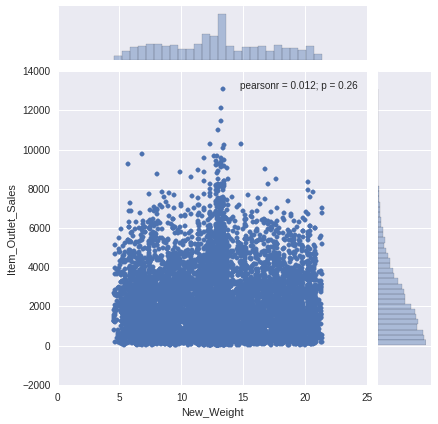

In [137]:
#no relation
sns.jointplot("Item_Weight","Item_Outlet_Sales",data=data)
#insignificant

/home/popoago/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


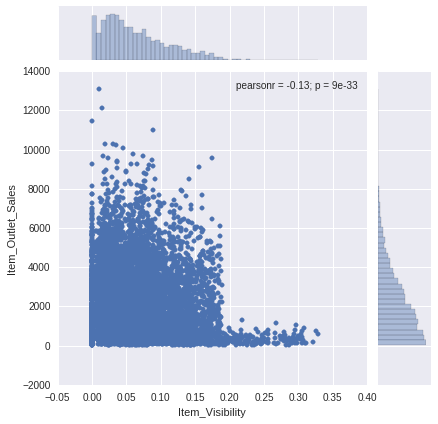

In [9]:
sns.jointplot("Item_Visibility","Item_Outlet_Sales",data=data)

/home/popoago/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


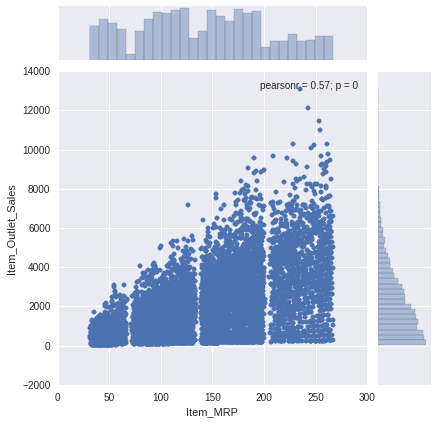

In [10]:
sns.jointplot("Item_MRP","Item_Outlet_Sales",data=data)

In [61]:
#the first year has more entries as 2 outlets opened this year so this field is insignificant
data.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [93]:
mod = ols('Item_Outlet_Sales ~ Outlet_Size ',data=data.fillna("un")).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                   sum_sq    df           F        PR(>F)
Outlet_Size  1.195038e+09     3  143.657467  8.228024e-91
Residual     2.362223e+10  8519         NaN           NaN


/home/popoago/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


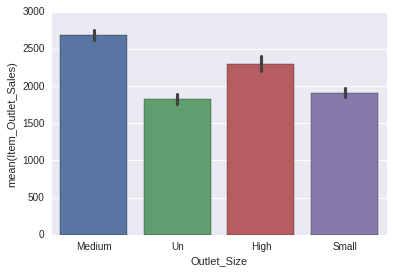

In [92]:
sns.barplot("Outlet_Size","Item_Outlet_Sales",data=data.fillna("Un"))

/home/popoago/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


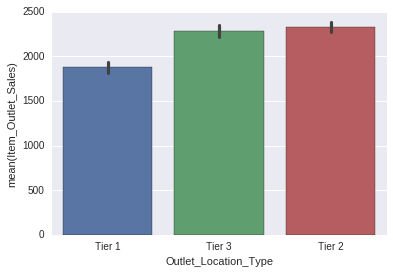

In [78]:
sns.barplot("Outlet_Location_Type","Item_Outlet_Sales",data=data)

/home/popoago/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


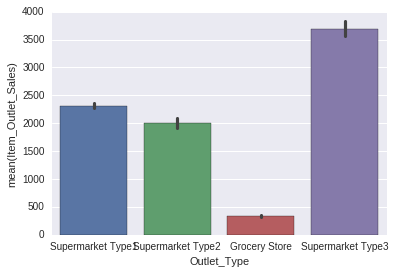

In [79]:
sns.barplot("Outlet_Type","Item_Outlet_Sales",data=data)

In [85]:
data.loc[data["Outlet_Size"]=="Medium","Outlet_Size"] = .5
data.loc[data["Outlet_Size"]=="High","Outlet_Size"] = 1
data.loc[data["Outlet_Size"]=="Small","Outlet_Size"] = 0

In [86]:
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [157]:
data.loc[data["Item_Fat_Content"]=="Low Fat","Item_Fat_Content"] = 'LF'
data.loc[data["Item_Fat_Content"]=="low fat","Item_Fat_Content"] = 'LF'
data.loc[data["Item_Fat_Content"]=="Regular","Item_Fat_Content"] = 'reg'
test.loc[test["Item_Fat_Content"]=="Low Fat","Item_Fat_Content"] = 'LF'
test.loc[test["Item_Fat_Content"]=="low fat","Item_Fat_Content"] = 'LF'
test.loc[test["Item_Fat_Content"]=="Regular","Item_Fat_Content"] = 'reg'

/home/popoago/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


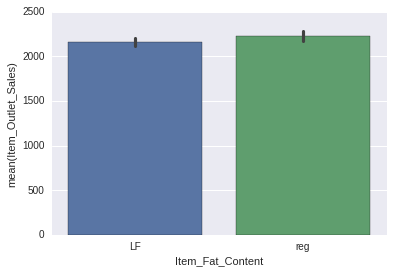

In [88]:
sns.barplot("Item_Fat_Content","Item_Outlet_Sales",data=data)

In [23]:
data.Item_Fat_Content.value_counts()

LF     5517
reg    3006
Name: Item_Fat_Content, dtype: int64

In [41]:
a = np.array(data.loc[data["Item_Fat_Content"]=='LF',"Item_Outlet_Sales"])
b = np.array(data.loc[data["Item_Fat_Content"]=='reg',"Item_Outlet_Sales"])
from scipy.stats import ttest_ind
t, p = ttest_ind(a, b, equal_var=False)
print('t-statistic = ',t,' , p-value = ',p)

t-statistic =  -1.72121013047  , p-value =  0.0852633946473


In [ ]:
#since p-value is not less than 0.05, it's statistically insignificant

In [54]:
mod = ols('Item_Outlet_Sales ~ Item_Fat_Content ',data=data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                        sum_sq    df         F    PR(>F)
Item_Fat_Content  8.695560e+06     1  2.986664  0.083989
Residual          2.480857e+10  8521       NaN       NaN


In [ ]:
#from f table, critical value of F for alpha=.05 is 3.5
#so, we retain the null

In [14]:
data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [53]:
mod = ols('Item_Outlet_Sales ~ Item_Type ',data=data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq    df         F    PR(>F)
Item_Type  1.176182e+08    15  2.700653  0.000388
Residual   2.469965e+10  8507       NaN       NaN


In [ ]:
#from f table, critical value of F for alpha=.05 is 1.667
#so, we reject the null

# model 1

In [80]:
data.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [158]:
fat = pd.get_dummies(data.Item_Fat_Content)
fat_t = pd.get_dummies(test.Item_Fat_Content)

In [207]:
year = pd.get_dummies(data.Outlet_Establishment_Year)
year_t = pd.get_dummies(test.Outlet_Establishment_Year)

In [159]:
itype = pd.get_dummies(data.Item_Type)
itype_t = pd.get_dummies(test.Item_Type)

In [223]:
ide = pd.get_dummies(data.Outlet_Identifier)
ide_t = pd.get_dummies(test.Outlet_Identifier)

In [161]:
loc = pd.get_dummies(data.Outlet_Location_Type)
loc_t = pd.get_dummies(test.Outlet_Location_Type)

In [162]:
otype = pd.get_dummies(data.Outlet_Type)
otype_t = pd.get_dummies(test.Outlet_Type)

In [224]:
x1 = pd.concat([data[["Item_Visibility","Item_MRP"]],itype,loc,otype,year,ide],axis=1)
x1_t = pd.concat([test[["Item_Visibility","Item_MRP"]],itype_t,loc_t,otype_t,year_t,ide_t],axis=1)

In [225]:
y1 = data["Item_Outlet_Sales"]

In [226]:
from sklearn.linear_model import LinearRegression

In [227]:
lreg = LinearRegression()

In [228]:
lreg.fit(x1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [229]:
y1_pred = Series(data=lreg.predict(x1_t),name="Item_Outlet_Sales")

In [230]:
sub1 = pd.concat([test[["Item_Identifier","Outlet_Identifier"]],y1_pred],axis=1)

In [231]:
sub1.to_csv("sub1.csv")

# model 2

In [179]:

#wherever weight values are missing, replace it with the mean of weight of that particular item type
k=data.groupby(["Item_Type"])["Item_Weight"].mean()
#where a is weight and b is item type
def null_weight(parameter):
    a,b = parameter
    if a==a:
        return a
    else:
        return k[b]

data["New_Weight"] = data[["Item_Weight","Item_Type"]].apply(null_weight,axis=1)
k=test.groupby(["Item_Type"])["Item_Weight"].mean()
test["New_Weight"] = test[["Item_Weight","Item_Type"]].apply(null_weight,axis=1)

#not needed actually because weight and sales aren't correlated.

In [232]:
x2 = pd.concat([data[["Item_Visibility","Item_MRP","New_Weight"]],itype,loc,otype,year,ide],axis=1)
x2_t = pd.concat([test[["Item_Visibility","Item_MRP","New_Weight"]],itype_t,loc_t,otype_t,year_t,ide_t],axis=1)

In [233]:
y2 = data["Item_Outlet_Sales"]

In [234]:
lreg.fit(x2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [235]:
y2_pred = Series(data=lreg.predict(x2_t),name="Item_Outlet_Sales")

In [236]:
sub2 = pd.concat([test[["Item_Identifier","Outlet_Identifier"]],y2_pred],axis=1)
sub2.to_csv("sub2.csv")